# Xac dinh NEN DOJI => Du bao dao chieu + can 1 nen xac nhan moi co the xac dinh dao chieu

# Cai dat thu vien

In [4]:
# ! pip install mplfinance

   ---------------------------------------- 0.0/75.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/75.0 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/75.0 kB ? eta -:--:--
   ---------------- ----------------------- 30.7/75.0 kB 435.7 kB/s eta 0:00:01
   -------------------------------- ------- 61.4/75.0 kB 465.5 kB/s eta 0:00:01
   ---------------------------------------- 75.0/75.0 kB 459.4 kB/s eta 0:00:00


# Lay data cua VCB

In [1]:
# Import necessary modules
from ssi_fc_data import fc_md_client, model
import pandas as pd  # Import Pandas for DataFrame handling
import json
import configDataSSL

# Create a Market Data Client
client = fc_md_client.MarketDataClient(configDataSSL)

req = model.daily_ohlc('VCB', "01/11/2023", "14/11/2023")

data_dict = client.daily_ohlc(configDataSSL, req)
# Access the list of dictionaries in the "data" field
data_list = data_dict['data']

# Convert the list of dictionaries into a DataFrame
data = pd.DataFrame(data_list)

# Print or work with the DataFrame
print(data)

  Symbol Market TradingDate  Time   Open   High    Low  Close   Volume  \
0    VCB   HOSE  01/11/2023  None  86800  87800  86100  87800  1479100   
1    VCB   HOSE  02/11/2023  None  88000  89000  86600  89000  1057500   
2    VCB   HOSE  03/11/2023  None  89000  89400  88100  88900  1086600   
3    VCB   HOSE  06/11/2023  None  88900  89800  88500  89500   774800   
4    VCB   HOSE  07/11/2023  None  89000  89300  88300  88300   413900   
5    VCB   HOSE  08/11/2023  None  88000  89700  87900  89500  1270300   
6    VCB   HOSE  09/11/2023  None  89500  89500  87900  87900  1166800   
7    VCB   HOSE  10/11/2023  None  87100  87500  86000  86000  1352000   
8    VCB   HOSE  13/11/2023  None  86000  86100  85400  85500   937700   
9    VCB   HOSE  14/11/2023  None  86000  86500  85400  86000   987500   

               Value  
0       128871800000  
1   92581159999.9999  
2        96662380000  
3   69184230000.0001  
4        36651660000  
5       113142150000  
6  103253840000.0010  
7

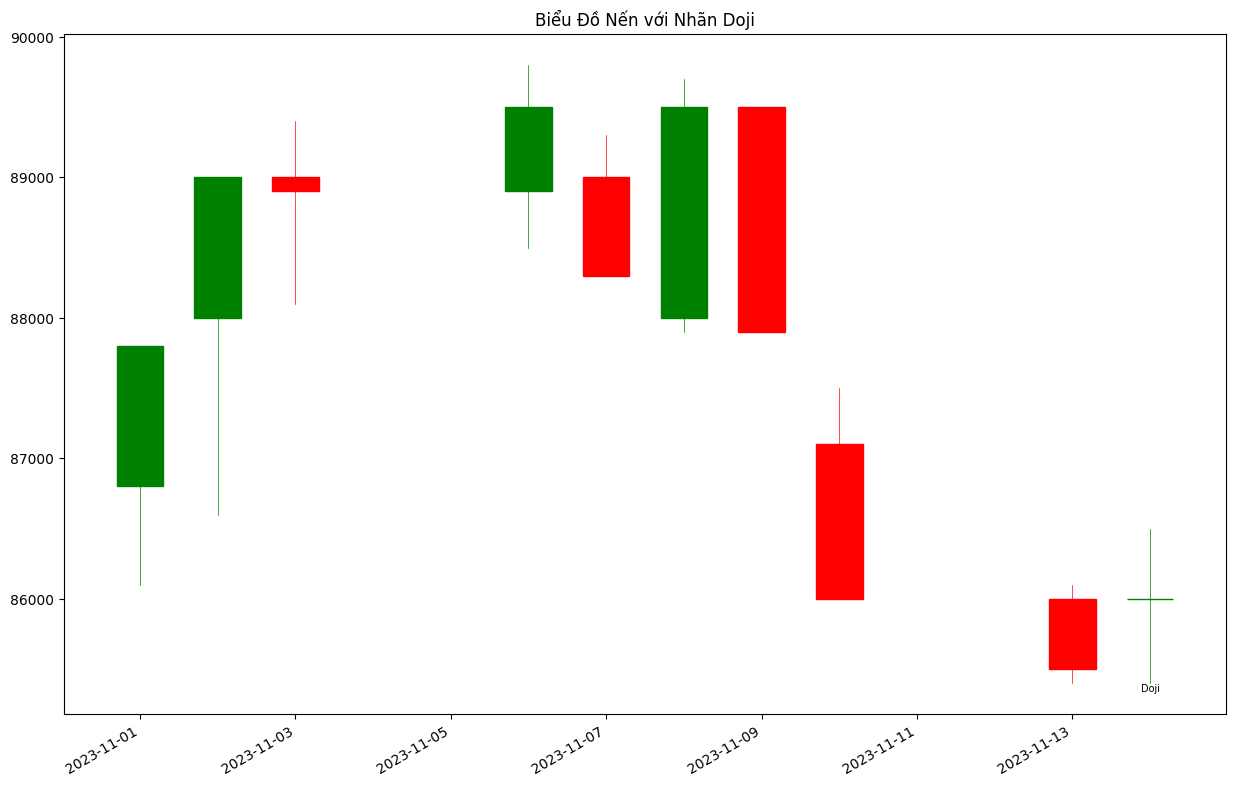

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc

# Giả sử 'data' là DataFrame của bạn chứa 'Open', 'High', 'Low', 'Close', 'Volume'
# Bạn cần đọc dữ liệu từ file CSV hoặc nguồn khác
# Ví dụ: data = pd.read_csv('path_to_your_csv.csv')

# Đảm bảo rằng cột 'TradingDate' đã được chuyển đổi thành datetime
data['TradingDate'] = pd.to_datetime(data['TradingDate'], dayfirst=True)
data.set_index('TradingDate', inplace=True)

# Chuyển đổi ngày thành số để vẽ biểu đồ
data['DateNum'] = mdates.date2num(data.index.to_pydatetime())
data['Open'] = pd.to_numeric(data['Open'], errors='coerce')
data['High'] = pd.to_numeric(data['High'], errors='coerce')
data['Low'] = pd.to_numeric(data['Low'], errors='coerce')
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')
ohlc = data[['DateNum', 'Open', 'High', 'Low', 'Close']].values

# Tính toán Doji candles
doji_threshold = 0.1 / 100 * data['Close']  # 0.1% của giá đóng cửa là một ví dụ
data['Doji'] = abs(data['Open'] - data['Close']) <= doji_threshold

# Vẽ biểu đồ với kích thước lớn
fig, ax = plt.subplots(figsize=(15, 10))  # Bạn có thể điều chỉnh kích thước ở đây

# Vẽ mô hình nến
candlestick_ohlc(ax, ohlc, width=0.6, colorup='green', colordown='red')

# Đánh dấu Doji candles trên biểu đồ
for index, row in data.iterrows():
    if row['Doji']:
        # Vẽ nhãn "Doji" ở giá thấp hơn một chút so với giá thấp nhất
        ax.text(row['DateNum'], row['Low'], 'Doji', fontsize=7, color='black', 
                verticalalignment='top', horizontalalignment='center')

# Định dạng trục thời gian
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()

plt.title("Biểu Đồ Nến với Nhãn Doji")
plt.show()


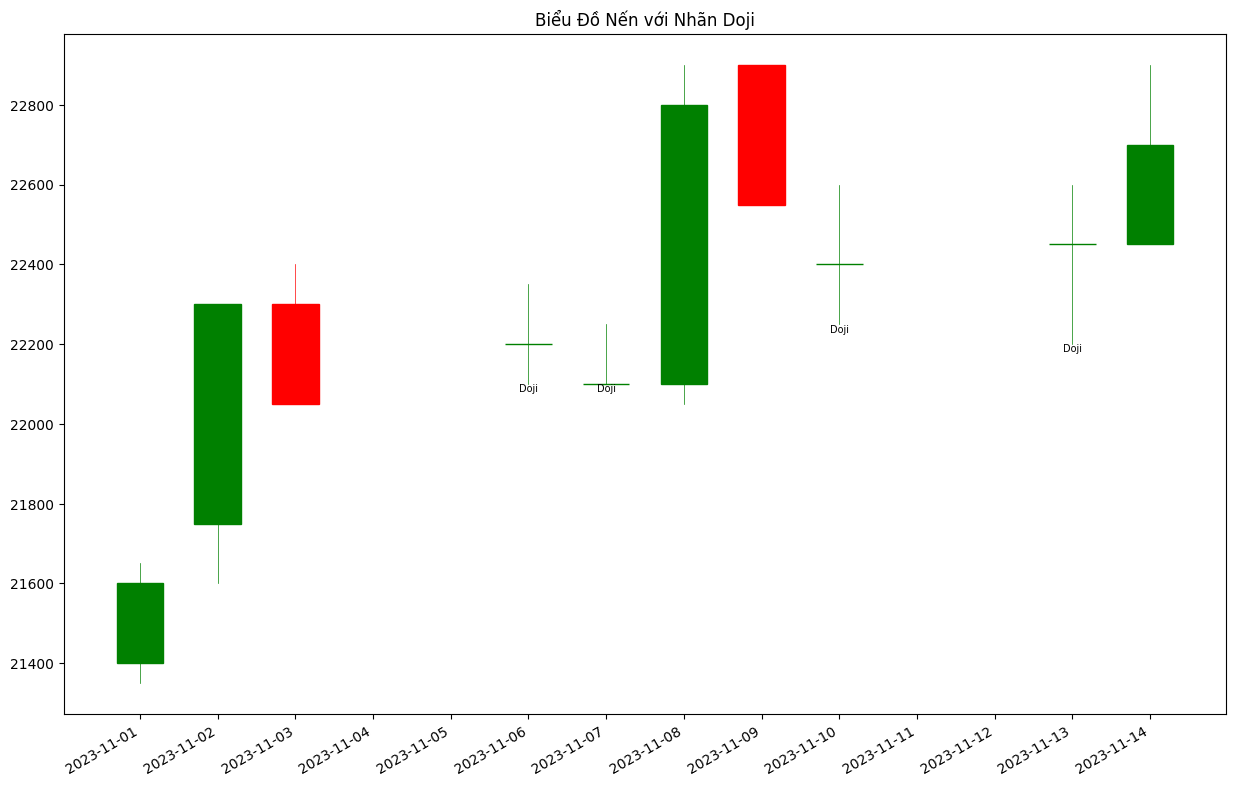

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc

# Bước 1: Đọc dữ liệu từ file CSV hoặc nguồn của bạn

# Bước 2: Định nghĩa ngưỡng để xác định nến Doji
doji_threshold = 0.1 / 100 * data['Close']  # 0.1% của giá đóng cửa là một ví dụ
data['Doji'] = abs(data['Open'] - data['Close']) <= doji_threshold

# Bước 3: Tạo một DataFrame mới chứa tất cả các ngày, kể cả ngày không giao dịch
all_days = pd.date_range(start=data.index.min(), end=data.index.max(), freq='D')
all_days_df = pd.DataFrame(index=all_days)

# Bước 4: Kết hợp DataFrame này với dữ liệu gốc của bạn
full_data = all_days_df.join(data, how='left')
full_data['DateNum'] = mdates.date2num(full_data.index.to_pydatetime())

# Bước 5: Vẽ biểu đồ nến và đánh dấu các nến Doji
fig, ax = plt.subplots(figsize=(15, 10))
ohlc = full_data[['DateNum', 'Open', 'High', 'Low', 'Close']].dropna().values

# Vẽ mô hình nến
candlestick_ohlc(ax, ohlc, width=0.6, colorup='green', colordown='red')

# Đánh dấu Doji candles trên biểu đồ
for index, row in data.iterrows():
    if row['Doji']:
        # Vẽ nhãn "Doji" ở giá thấp hơn một chút so với giá thấp nhất
        ax.text(row['DateNum'], row['Low'], 'Doji', fontsize=7, color='black', 
                verticalalignment='top', horizontalalignment='center')

# Thiết lập locator và formatter cho trục x để hiển thị theo tháng
ax.xaxis.set_major_locator(mdates.DayLocator())  # Chỉ đặt tick ở đầu mỗi tháng
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Hiển thị năm và tháng

# Đảm bảo rằng mỗi tick trục x có đủ không gian, có thể cần phải xoay các nhãn
fig.autofmt_xdate()

plt.title("Biểu Đồ Nến với Nhãn Doji")
plt.show()
